#Building a Multiple Linear Regression model to predict the price of the Toyota Corolla car

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

In [15]:
cars = pd.read_csv(r'/content/ToyotaCorolla.csv', engine='python')

In [16]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
cars

In [37]:
cars = pd.DataFrame(cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]])

In [39]:
cars.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [42]:
cars.shape

(1436, 9)

In [44]:
cars[cars.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [66]:
cars.iloc[[112,113,114],]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320
114,22950,7,10000,116,2000,5,5,234,1270


In [106]:
toyota = cars.drop_duplicates().reset_index()

In [108]:
toyota = toyota.drop(['index'],axis=1)

In [109]:
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [110]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


#Correlation Matrix

In [111]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [112]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


#Scatterplot between variables along with Hystogram

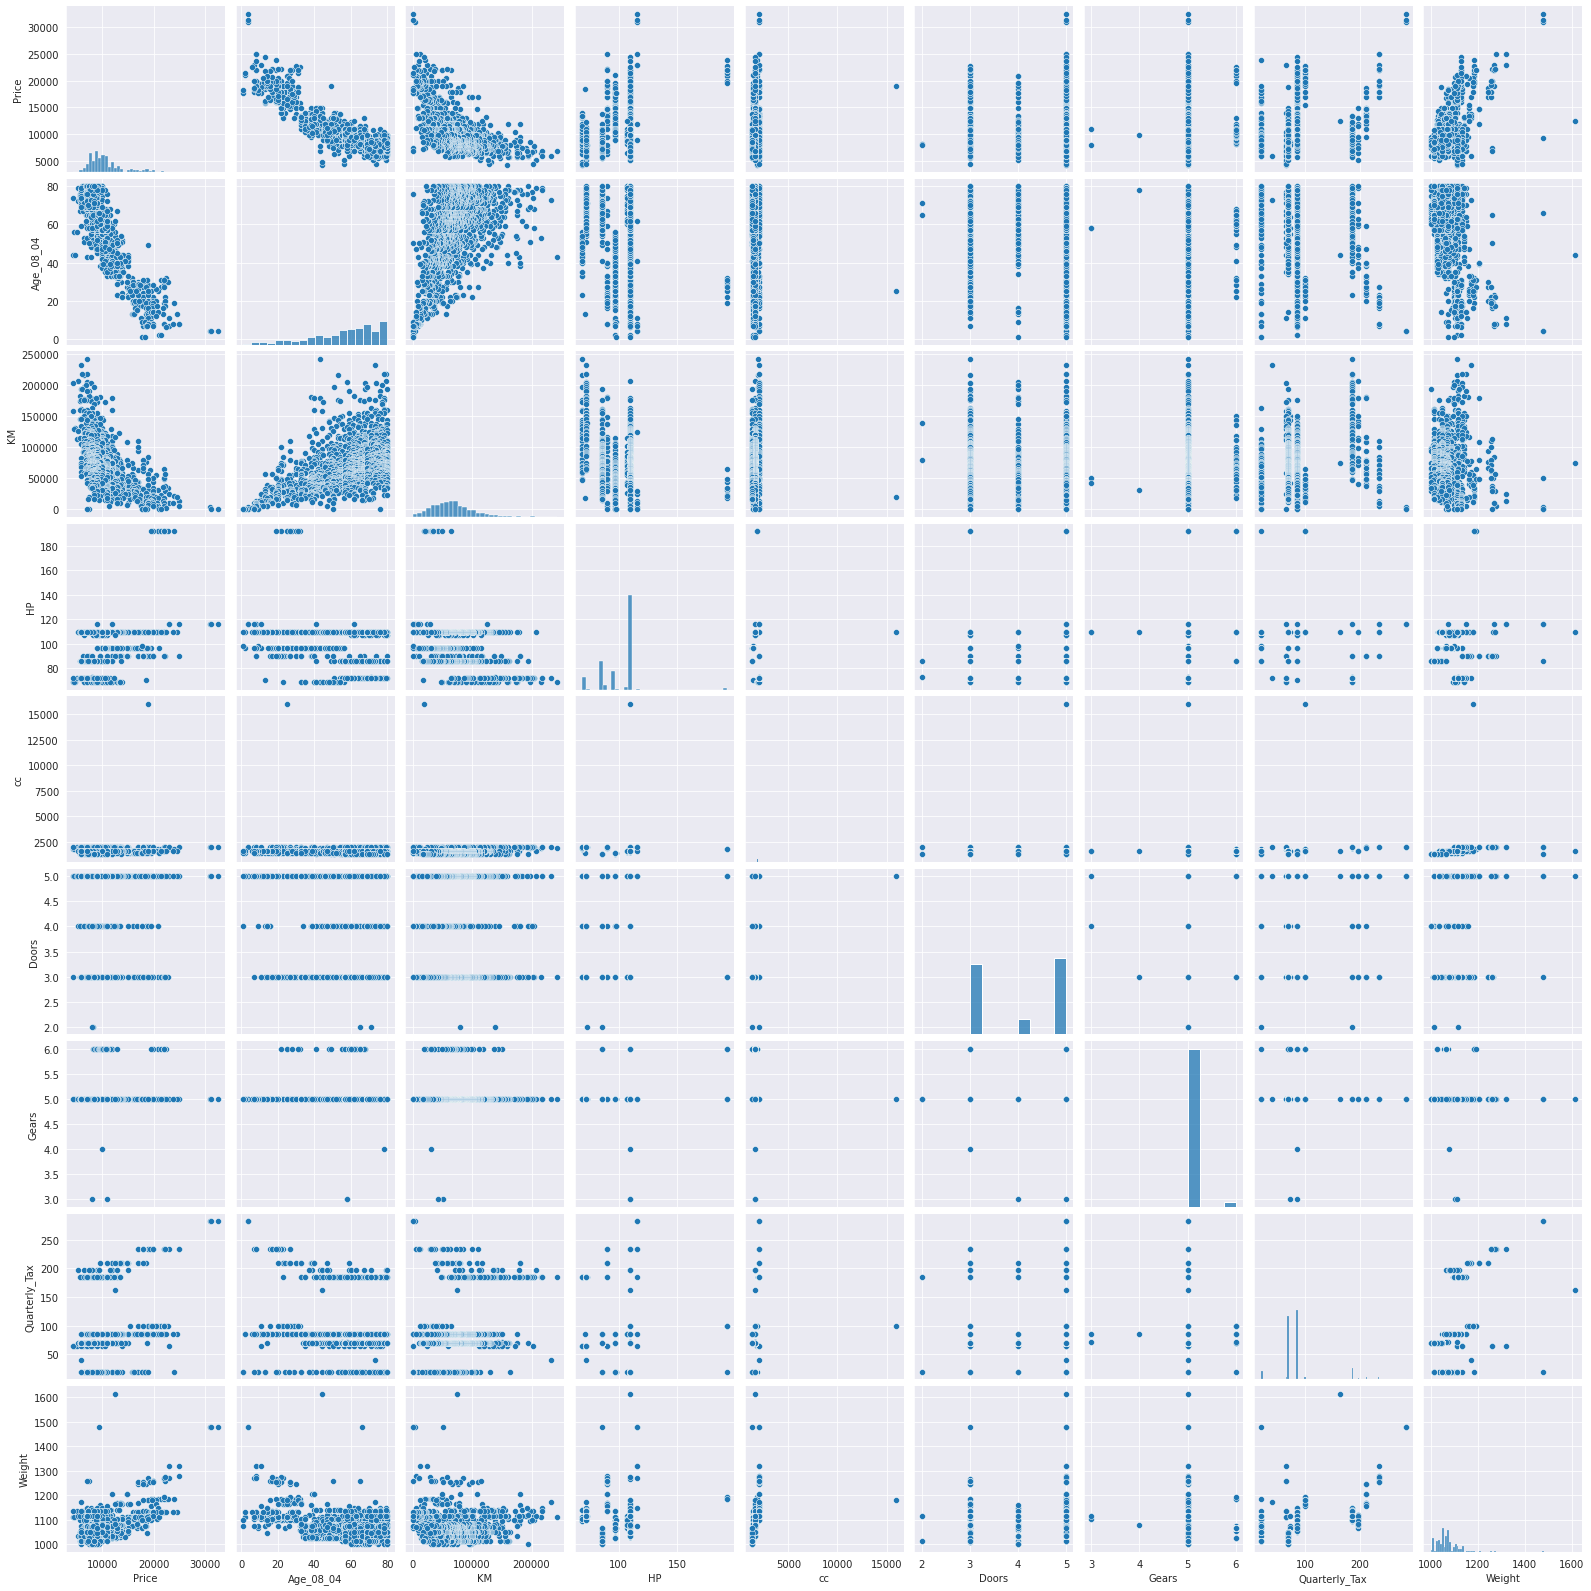

In [113]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

#Preparing a model

In [114]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [116]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota).fit()

In [117]:
#Coefficients
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [118]:
#tvalue and p_values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [119]:
#R Square Values
(model.rsquared, model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

Simple Linear Regression step is not required as the pvalue is less than the (0.05)

#Residual Analysis

####Text for Normality of Residuals (Q-Q Plot)

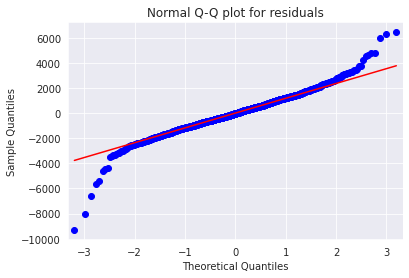

In [120]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot for residuals')
plt.show()

In [123]:
list(np.where(model.resid > 6000))

[array([109, 146, 522])]

In [122]:
list(np.where(model.resid < -6000))

[array([220, 600, 959])]

#Residual Plot for Homoscedasticity

In [124]:
def get_standardize_values( vals ):
    return(vals - vals.mean())/vals.std()

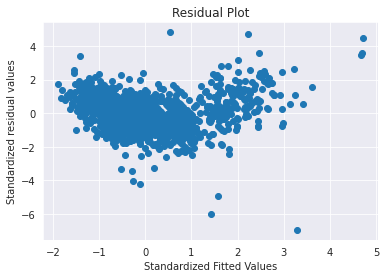

In [125]:
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid))

plt.title("Residual Plot")
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual Vs Regressors

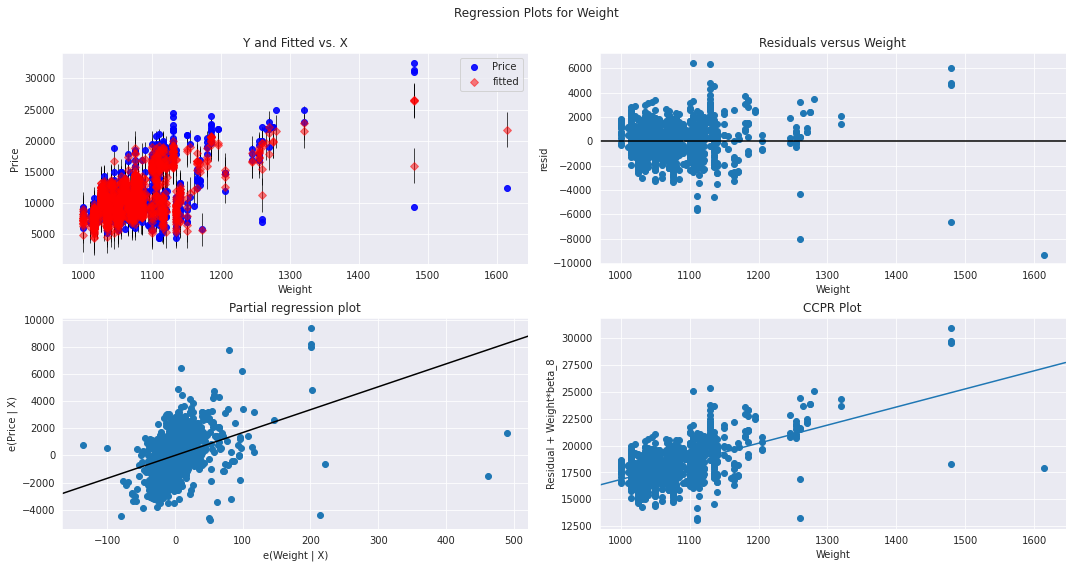

In [126]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

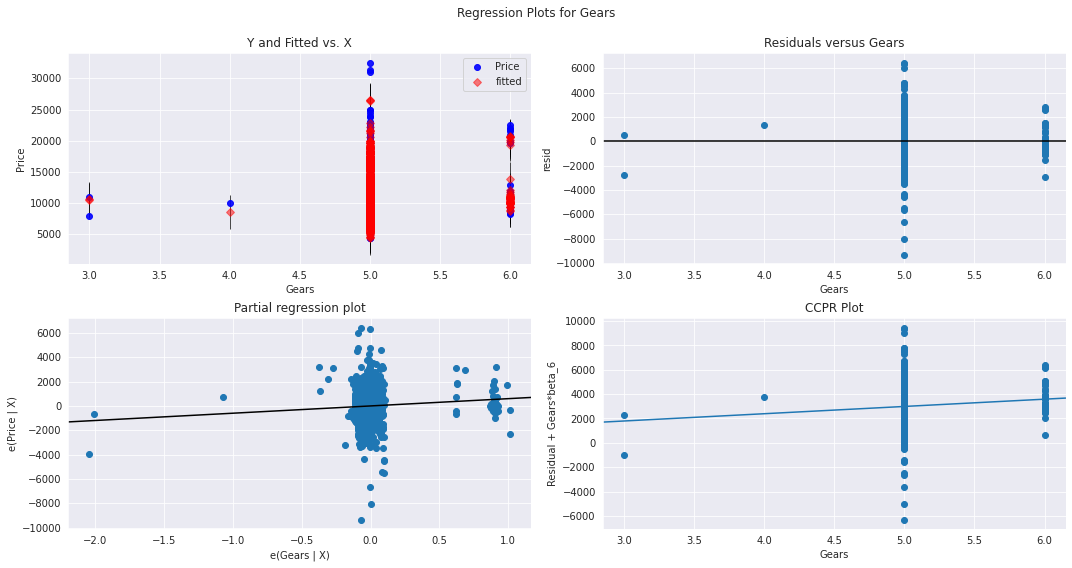

In [127]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

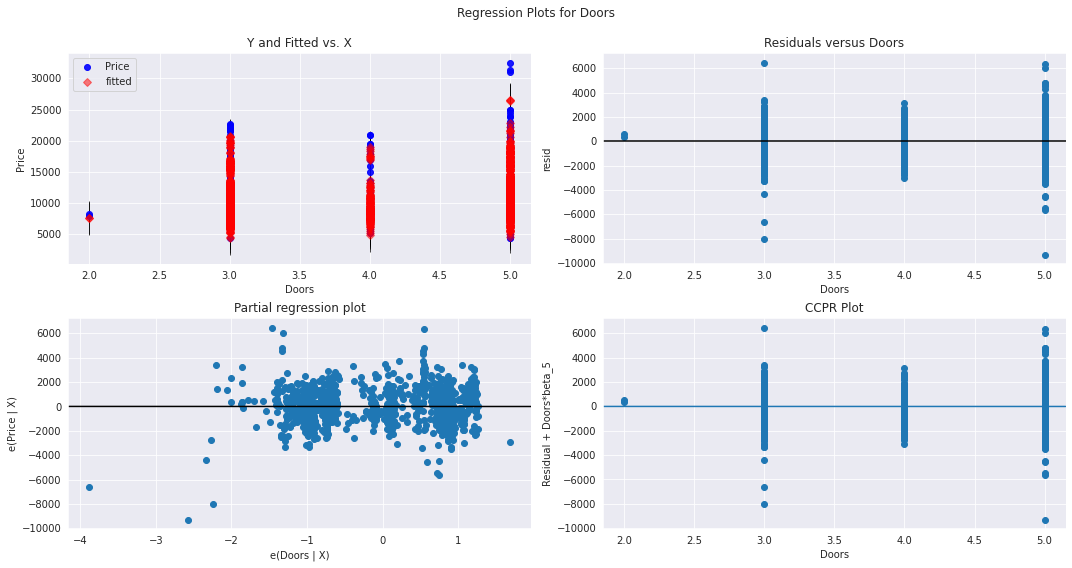

In [128]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

As the CCRP graph indicate 0, there is no correlation between the doors and the Price.

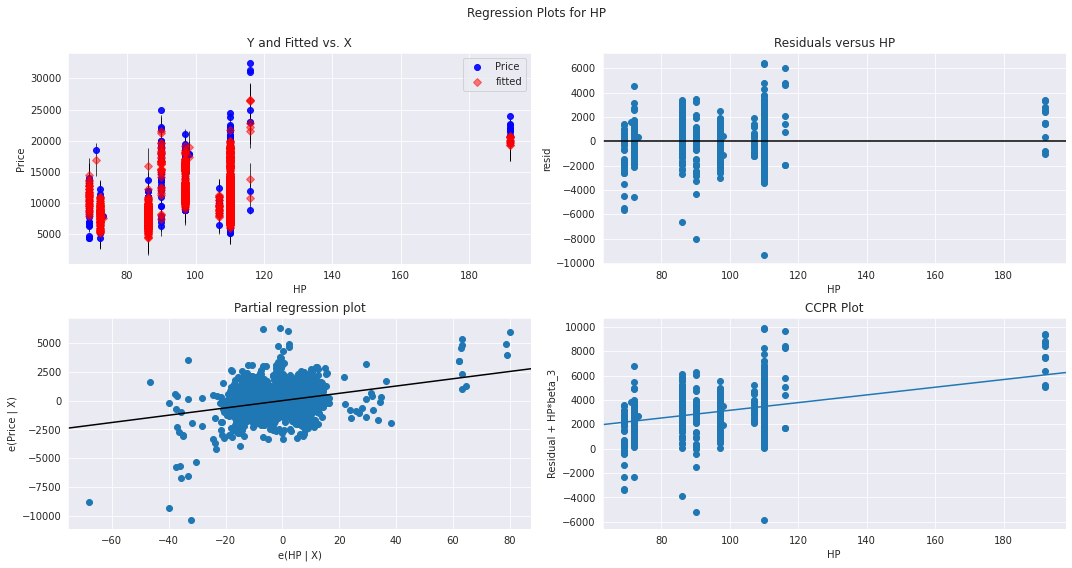

In [129]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

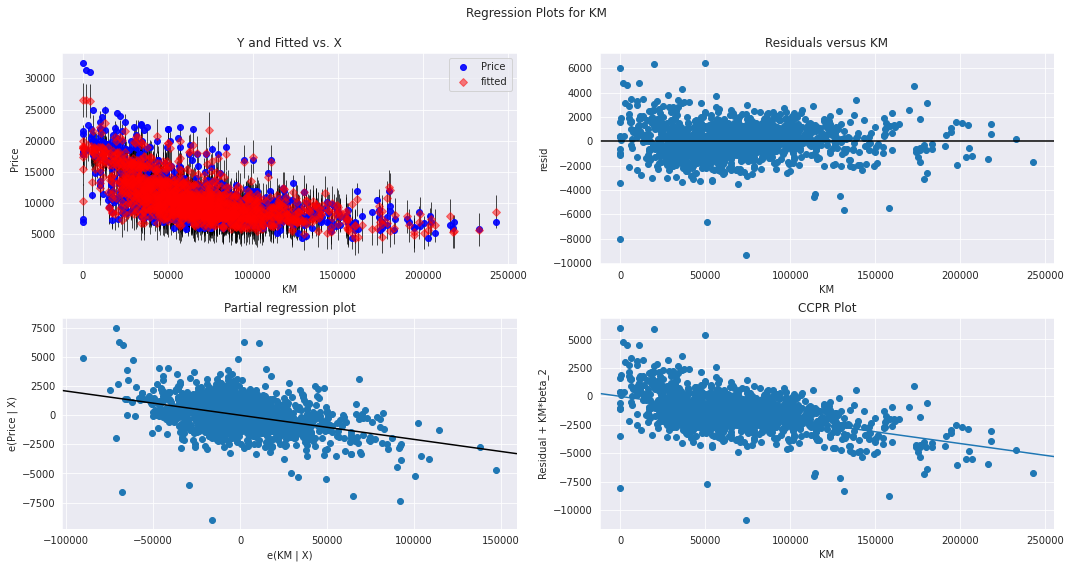

In [130]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

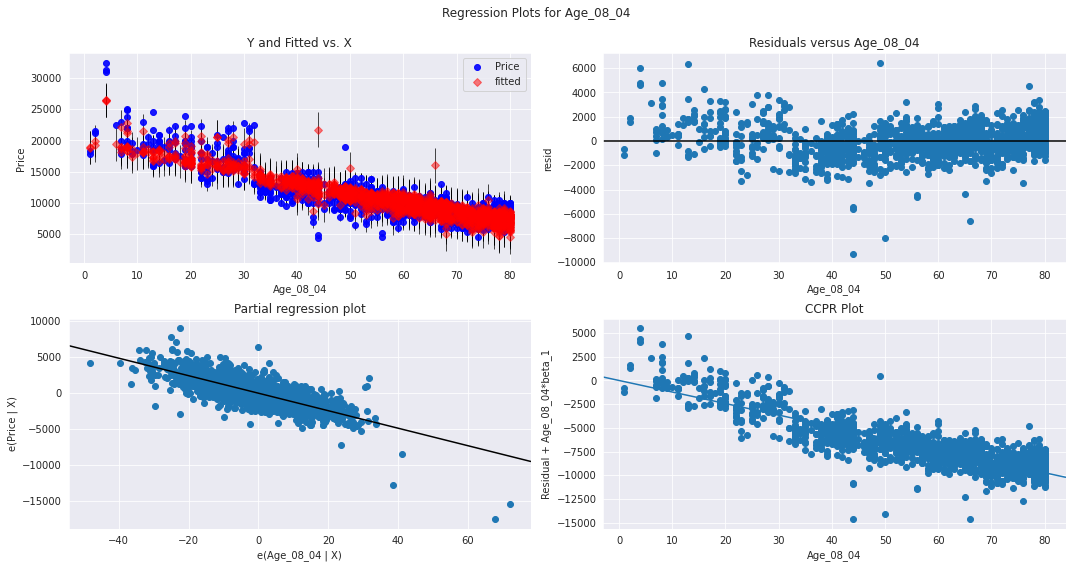

In [131]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

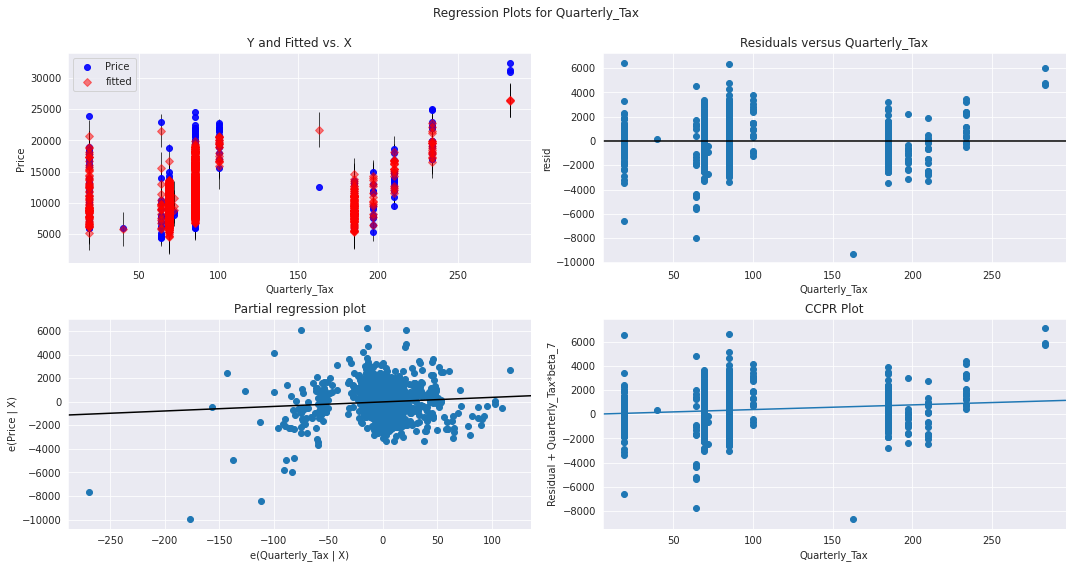

In [132]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

#Model Deletion Diagnostics

Detecting influencers/Outliers

#Cooks Distance

In [133]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


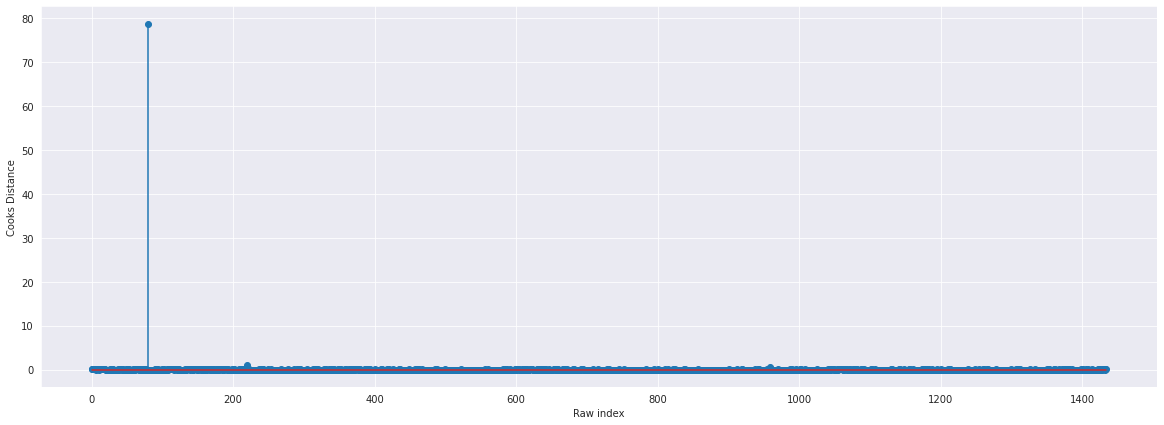

In [135]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(toyota)), np.round(c,3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [136]:
#index and values of influencer where c is more than 1
(np.argmax(c), np.max(c))

(80, 78.72950582259465)

#High Indluence points

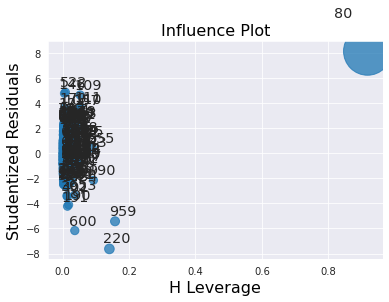

In [137]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [138]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [139]:
leverage_cutoff

0.020891364902506964

#Improving the model

In [142]:
#Load the Data
toyota_new = toyota.copy()

In [144]:
toyota_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [145]:
toyota_new = toyota_new.drop(toyota_new.index[[80]], axis=0).reset_index()

In [146]:
toyota_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          1434 non-null   int64
 1   Price          1434 non-null   int64
 2   Age_08_04      1434 non-null   int64
 3   KM             1434 non-null   int64
 4   HP             1434 non-null   int64
 5   cc             1434 non-null   int64
 6   Doors          1434 non-null   int64
 7   Gears          1434 non-null   int64
 8   Quarterly_Tax  1434 non-null   int64
 9   Weight         1434 non-null   int64
dtypes: int64(10)
memory usage: 112.2 KB


In [147]:
toyota_new = toyota_new.drop(['index'], axis=1)

In [148]:
toyota_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1434 non-null   int64
 1   Age_08_04      1434 non-null   int64
 2   KM             1434 non-null   int64
 3   HP             1434 non-null   int64
 4   cc             1434 non-null   int64
 5   Doors          1434 non-null   int64
 6   Gears          1434 non-null   int64
 7   Quarterly_Tax  1434 non-null   int64
 8   Weight         1434 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


#Build the model again

In [149]:
final_ml = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota_new).fit()

In [150]:
(final_ml.rsquared, final_ml.aic)

(0.8681163912634053, 24669.363894157)

Rsquare value has increased slightly and aic value has decreased as compared with previous model, which is a good sign

#Cook's Distance

In [153]:
final_model_infulence = final_ml.get_influence()
(c_1,_) = final_model_infulence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


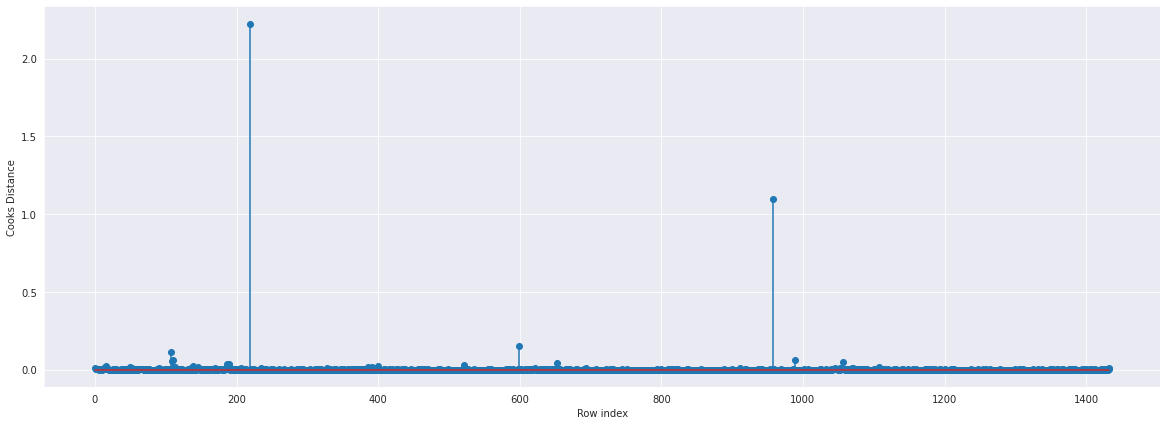

In [155]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota_new)), np.round(c_1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [156]:
(np.argmax(c_1), np.max(c_1))

(219, 2.225351365527531)

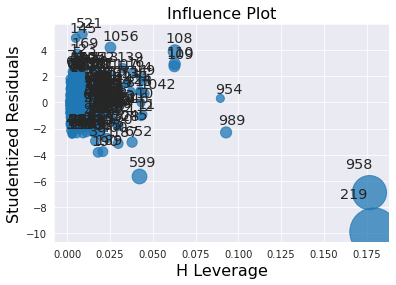

In [157]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml)
plt.show()

In [167]:
toyota_new.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [169]:
toyota_new.iloc[[219,958]]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
219,12450,44,74172,110,1600,5,5,163,1615
958,9390,66,50806,86,1300,3,5,19,1480


In [178]:
toyota_new2 = toyota_new.drop(toyota_new.index[[219,958]], axis=0).reset_index()

In [179]:
toyota_new2.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [180]:
toyota_new2 = toyota_new2.drop(['index'], axis=1)

In [182]:
toyota_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1432 non-null   int64
 1   Age_08_04      1432 non-null   int64
 2   KM             1432 non-null   int64
 3   HP             1432 non-null   int64
 4   cc             1432 non-null   int64
 5   Doors          1432 non-null   int64
 6   Gears          1432 non-null   int64
 7   Quarterly_Tax  1432 non-null   int64
 8   Weight         1432 non-null   int64
dtypes: int64(9)
memory usage: 100.8 KB


In [183]:
final_ml = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota_new2).fit()

In [184]:
model_influence = final_ml.get_influence()
(c_2,_) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


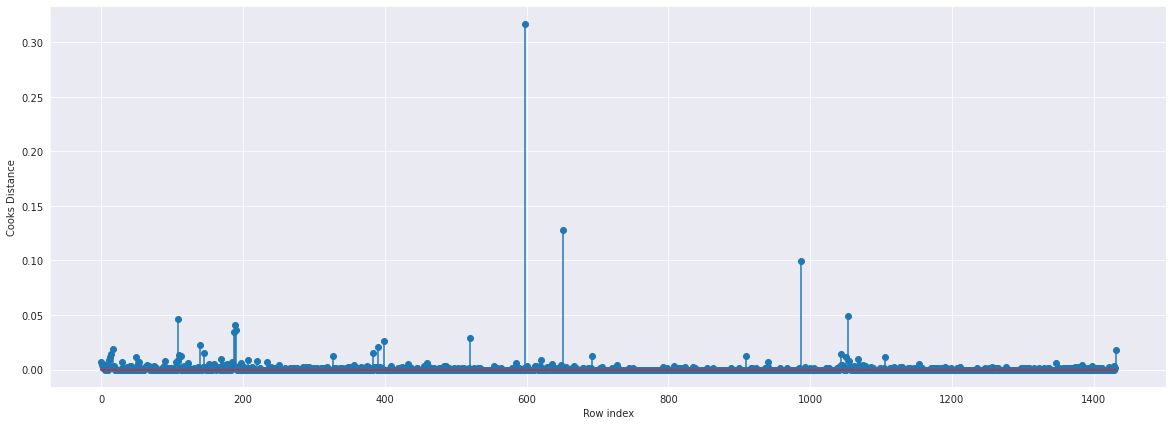

In [185]:
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(toyota_new2)), np.round(c_2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [186]:
(np.argmax(c_2), np.max(c_2))

(598, 0.31689035401452836)

Since the value of the datapoint is <1, we can stop the diagnostic process and finalize the model

In [187]:
final_ml = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota_new2).fit()

In [188]:
(final_ml.rsquared, final_ml.aic)

(0.8839684606741538, 24453.23573612724)

Rsquare of the model has been increased from 0.868 to 0.883 and the AIC value has been decreased from 24669.363 to 24453.235
It is a great equation model

#Predicting for new data

In [192]:
#new Data for Prediction
new_data = pd.DataFrame({'Age_08_04':23,"KM":46986, 'cc':2000, 'HP' : 90, 'Doors':3, 'Gears':5, 'Quarterly_Tax':210, 'Weight': 1165}, index=[1])

In [193]:
new_data

,Age_08_04,KM,cc,HP,Doors,Gears,Quarterly_Tax,Weight
1,23,46986,2000,90,3,5,210,1165


In [194]:
final_ml.predict(new_data)

1    16326.634426
dtype: float64

#Result : Price of the given data set is 16326.634426 EUROs